# Auto Generated Agent Chat: GPTAssistant with Code Interpreter
The latest released Assistants API by OpenAI allows users to build AI assistants within their own applications. The Assistants API currently supports three types of tools: Code Interpreter, Retrieval, and Function calling. In this notebook, we demonstrate how to enable `GPTAssistantAgent` to use code interpreter. 

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install:
```bash
pip install pyautogen
```

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

In [3]:
%pip install pyautogen

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    file_location=".",
    filter_dict={
        "model": ["gpt-3.5-turbo", "gpt-35-turbo", "gpt-4", "gpt4", "gpt-4-32k", "gpt-4-turbo"],
    },
)

It first looks for environment variable "OAI_CONFIG_LIST" which needs to be a valid json string. If that variable is not found, it then looks for a json file named "OAI_CONFIG_LIST". It filters the configs by models (you can filter by other keys as well).

The config list looks like the following:
```python
config_list = [
    {
        "model": "gpt-4",
        "api_key": "<your OpenAI API key>",
    },  # OpenAI API endpoint for gpt-4
]
```

Currently Azure OpenAi does not support assistant api. You can set the value of config_list in any way you prefer. Please refer to this [notebook](https://github.com/microsoft/autogen/blob/main/notebook/oai_openai_utils.ipynb) for full code examples of the different methods.

## Perform Tasks Using Code Interpreter

We demonstrate task solving using `GPTAssistantAgent` with code interpreter. Pass `code_interpreter` in `tools` parameter to enable `GPTAssistantAgent` with code interpreter. It will write code and automatically execute it in a sandbox. The agent will receive the results from the sandbox environment and act accordingly.

### Example 1: Math Problem Solving
In this example, we demonstrate how to use code interpreter to solve math problems.


In [10]:
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent
from autogen.agentchat import AssistantAgent, UserProxyAgent

# Initiate an agent equipped with code interpreter
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "tools": [
            {
                "type": "code_interpreter"
            }
        ],
        "config_list": config_list,
    },
    instructions="You are an expert at solving math questions. Write code and run it to solve math problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
    human_input_mode="NEVER"
)

# When all is set, initate the chat.
user_proxy.initiate_chat(gpt_assistant, message="If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?")


[autogen.oai.client: 12-07 21:58:51] {76} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-07 21:58:51] {76} WARNING - openai client was provided with an empty config_list, which may not be intended.


user_proxy (to Coder Assistant):

If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

The value of \( x - y \) is \(-48\).


--------------------------------------------------------------------------------
user_proxy (to Coder Assistant):



--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

It seems like you've left your message blank. If you have any more math problems or questions you'd like me to help with, feel free to ask!


--------------------------------------------------------------------------------
user_proxy (to Coder Assistant):



--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

I'm here to assist you whenever you're ready. If you have any questions or need further assistance, please let me know!


---

### Example 2: Plotting with Code Interpreter

Code Interpreter can outputs files, such as generating image diagrams. In this example, we demonstrate how to draw figures and download it.

In [11]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "tools": [
            {
                "type": "code_interpreter"
            }
        ],
        "config_list": config_list,
    },
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy.initiate_chat(gpt_assistant, message="Draw a line chart to show the population trend in US. Show how you solved it with code.", clear_history=True)

[autogen.oai.client: 12-07 21:59:28] {76} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-07 21:59:28] {76} WARNING - openai client was provided with an empty config_list, which may not be intended.


user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in US. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To draw a line chart showing the population trend in the US, we would typically need historical population data for the country. Since I don't have access to the internet in this environment to download the latest data, I can demonstrate how to create a line chart with some example data.

Assuming we have the following sample data for the US population trend for some arbitrary years:

```python
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
population = [151325798, 179323175, 203211926, 226545805, 248709873, 281421906, 308745538, 331502651]
```

Let's create a line chart with this data using Python's `matplotlib` library. If you have specific data or a source for it, please provide it or instruct me to use this sample data.


Recieved file id

Now we have the file id. We can download and display it.

In [14]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.4 MB/s eta 0:00:00:00:01


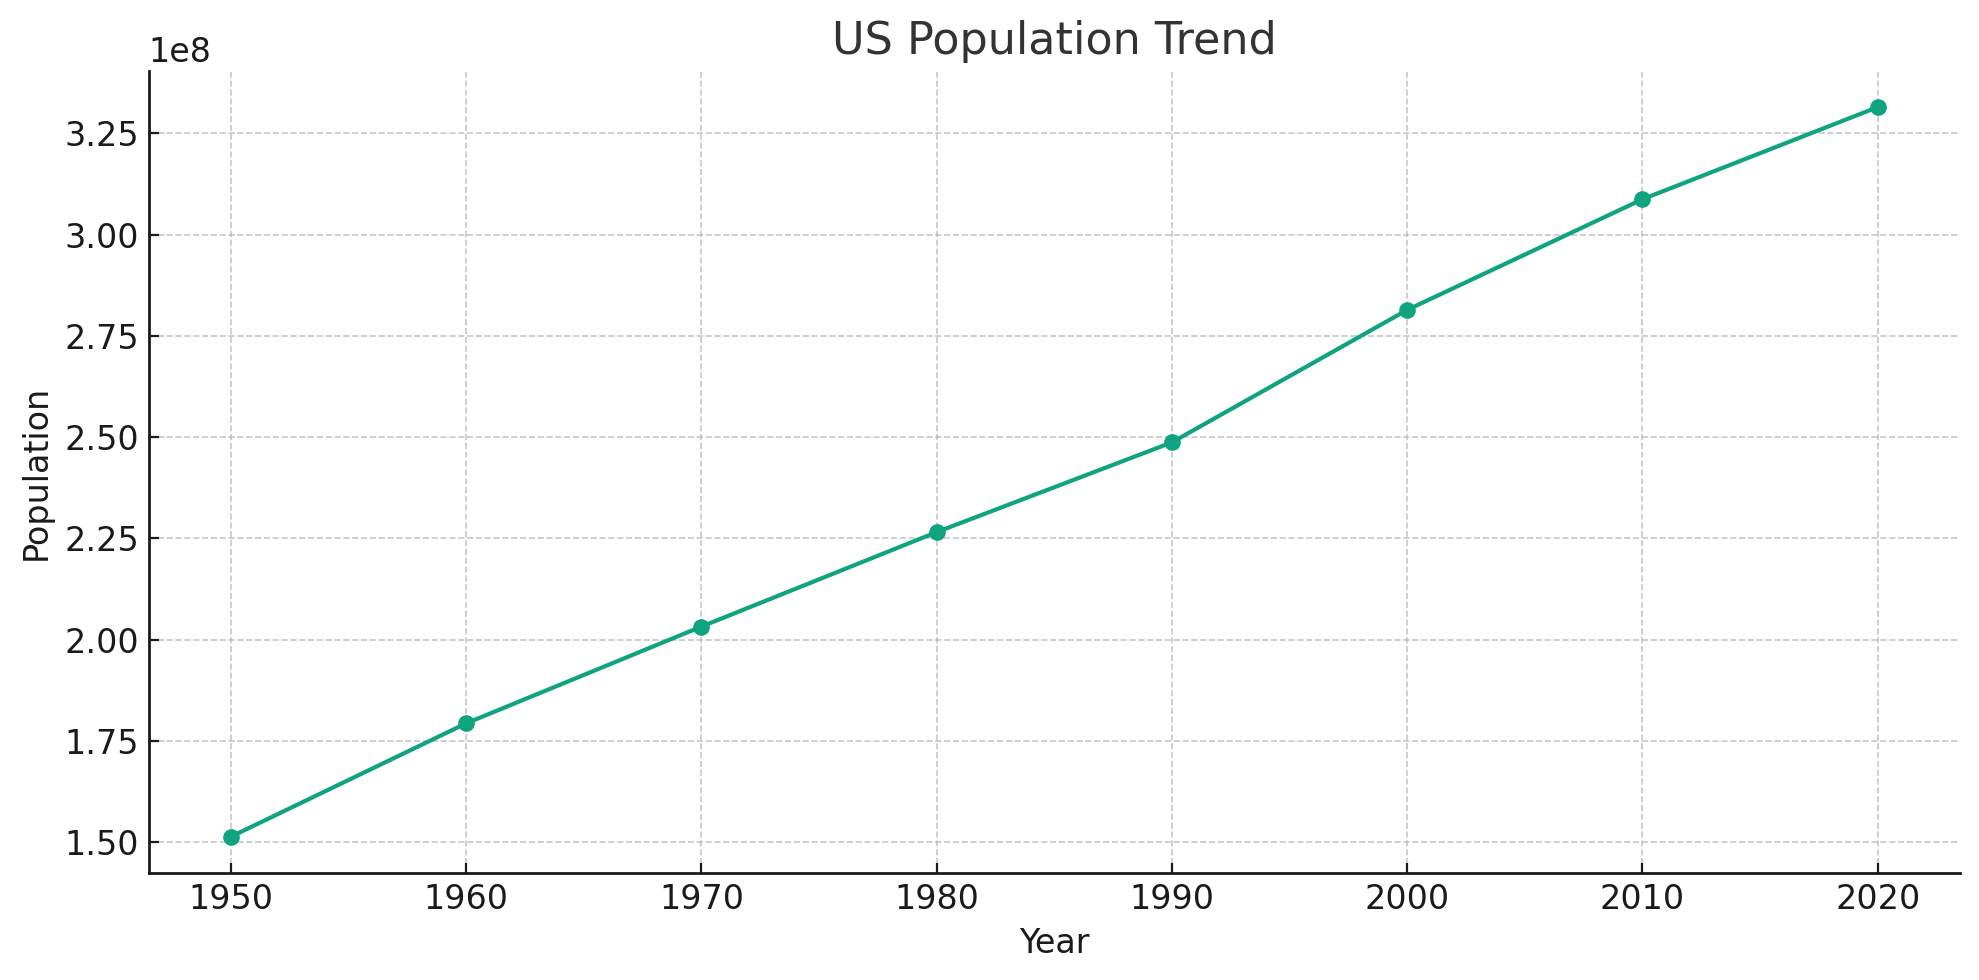

In [15]:
from PIL import Image
import io
from IPython.display import display

api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content("file-9f5JBsgTWPeslSXMetQgT6gh")

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)